In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("players.csv")
df

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


In [ ]:
df.dtypes

PLAYER_NAME    object
TEAM_ID         int64
PLAYER_ID       int64
SEASON          int64
dtype: object

In [ ]:
df.shape # 7228 rows or players, 4 columns or features.

(7228, 4)

In [ ]:
pd.isnull(df) 
# It's true if it is missing value or null
# It's false if it isn't.

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
7223,False,False,False,False
7224,False,False,False,False
7225,False,False,False,False
7226,False,False,False,False


In [ ]:
pd.isnull(df).sum()
# every single column and it adds up all the true values
# if there are no nulls in a column it's going to show zero
#if there are nulls it'll show the number of nulls in that column

PLAYER_NAME    0
TEAM_ID        0
PLAYER_ID      0
SEASON         0
dtype: int64

In [ ]:
df.columns 

Index(['PLAYER_NAME', 'TEAM_ID', 'PLAYER_ID', 'SEASON'], dtype='object')

In [ ]:
# Find of the average value for each numeric column
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


TEAM_ID      1.610613e+09
PLAYER_ID    2.355862e+06
SEASON       2.014160e+03
dtype: float64

In [ ]:
# Get the mean or average of specific column
df.loc[:,"SEASON"].mean()

2014.1599335915882

In [5]:
df[["TEAM_ID", "PLAYER_ID", "SEASON"]].corr()

,TEAM_ID,PLAYER_ID,SEASON
TEAM_ID,1.000000,0.037760,-0.005819
PLAYER_ID,0.037760,1.000000,-0.014956
SEASON,-0.005819,-0.014956,1.000000


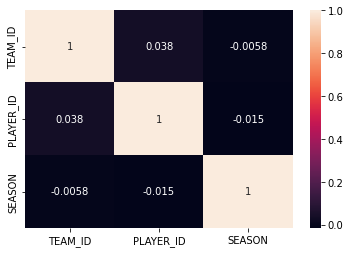

In [4]:
# Make heat map to see correlations
correlation = df[["TEAM_ID", "PLAYER_ID", "SEASON"]].corr()
sns.heatmap(correlation, annot=True)

In [12]:
# Make the cluster of players using kMeans
from sklearn.cluster import KMeans
KMeans_model = KMeans(n_clusters=5,random_state=1) # creating Kmeans model with 5 clusters
good_columns = df._get_numeric_data().dropna(axis=1) # Get numeric data and remove columns with missing data
KMeans_model.fit(good_columns) # Train the model
labels = KMeans_model.labels_ # Get the labels or (cluster label for each player)
labels

array([3, 0, 0, ..., 0, 0, 0], dtype=int32)

In [33]:
# Find player Donovan
Donovan= good_columns.loc[df["PLAYER_NAME"] == "Donovan Mitchell",: ]
Donovan

,TEAM_ID,PLAYER_ID,SEASON
3,1610612762,1628378,2019
768,1610612762,1628378,2018
1445,1610612762,1628378,2017


In [30]:
df.loc[10]

PLAYER_NAME    Georges Niang
TEAM_ID           1610612762
PLAYER_ID            1627777
SEASON                  2019
Name: 10, dtype: object

In [31]:
# Find player Georges
Georges= good_columns.loc[df["PLAYER_NAME"] == "Georges Niang",: ]
Georges

,TEAM_ID,PLAYER_ID,SEASON
10,1610612762,1627777,2019
772,1610612762,1627777,2018
1623,1610612762,1627777,2017
1997,1610612744,1627777,2017
2084,1610612744,162777,2017
2529,1610612754,1627777,2016


In [53]:
Player_name= good_columns.loc[df["SEASON"] == 2019,: ]
Player_name

,TEAM_ID,PLAYER_ID,SEASON
0,1610612762,1626220,2019
1,1610612762,202711,2019
2,1610612762,203497,2019
3,1610612762,1628378,2019
4,1610612762,201144,2019
...,...,...,...
621,1610612745,203461,2019
622,1610612737,1629034,2019
623,1610612744,203906,2019
624,1610612753,1629755,2019


In [43]:
df.groupby("PLAYER_NAME")["SEASON"].value_counts()

PLAYER_NAME         SEASON
AJ Hammons          2016      1
                    2017      1
AJ Price            2014      3
                    2009      1
                    2010      1
                             ..
Zion Williamson     2019      1
Zoran Dragic        2014      2
Zydrunas Ilgauskas  2009      1
                    2010      1
Zylan Cheatham      2019      1
Name: SEASON, Length: 6287, dtype: int64

In [47]:
df.groupby("SEASON").size()

SEASON
2009    597
2010    623
2011    582
2012    637
2013    653
2014    697
2015    668
2016    675
2017    722
2018    748
2019    626
dtype: int64

In [60]:
# Converting the data into lists for model prediction
Donovan_list = Donovan.values.tolist()
Georges_list = Georges.values.tolist()

# The cluster classification of Donovan Mitchell and Georges Niang
Donovan_cluster = KMeans_model.predict(Donovan_list) # Donovan belongs to cluster 3, and George Niang belongs to cluster 3
Georges_cluster = KMeans_model.predict(Georges_list)

# print the cluster label
print(Donovan_cluster)
print(Georges_cluster)

[3 3 3]
[3 3 3 3 0 3]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [63]:
df.corr()

,TEAM_ID,PLAYER_ID,SEASON
TEAM_ID,1.000000,0.037760,-0.005819
PLAYER_ID,0.037760,1.000000,-0.014956
SEASON,-0.005819,-0.014956,1.000000


In [84]:
# Split the datga into % 80 training and % 20 testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[["TEAM_ID"]], df[["PLAYER_ID"]], test_size=0.2,random_state=2)

In [85]:
# Predict the number of assists per player from the field goals made
# Create the Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train) # training the model
predictions = lr.predict(x_test) # Make predictions on the test data

print(predictions) # Print the predictions
print(y_test) # Print the actual values

[[3507301.5   ]
 [5993977.0625]
 [2125815.    ]
 ...
 [3231004.1875]
 [4612490.625 ]
 [1020625.875 ]]
      PLAYER_ID
4063     203954
5331       2567
5066     201880
6931     200752
1539     203476
...         ...
1589    1628403
4481     202329
6871     101122
4798     201971
6870       1730

[1446 rows x 1 columns]


In [87]:
# Test model: Score returns the coefficient of determination R^2 of the prediction
lr_confidence = lr.score(x_test, y_test)
print("lr_confidence: ", lr_confidence)
# % 0,11 variance for assist is explained by the field goald the player

lr_confidence:  0.001100883257563412


In [157]:
# Ranking 

In [161]:
df = pd.read_csv("ranking.csv")
df

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
201788,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
201789,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
201790,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [100]:
df.dtypes

TEAM_ID            int64
LEAGUE_ID          int64
SEASON_ID          int64
STANDINGSDATE     object
CONFERENCE        object
TEAM              object
G                  int64
W                  int64
L                  int64
W_PCT            float64
HOME_RECORD       object
ROAD_RECORD       object
RETURNTOPLAY     float64
dtype: object

In [101]:
df.shape # 201792 rows , 13 columns or features.

(201792, 13)

In [102]:
df.columns

Index(['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE',
       'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD',
       'RETURNTOPLAY'],
      dtype='object')

In [104]:
pd.isnull(df) 
# It's true if it is missing value or null
# It's false if it isn't.

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787,False,False,False,False,False,False,False,False,False,False,False,False,True
201788,False,False,False,False,False,False,False,False,False,False,False,False,True
201789,False,False,False,False,False,False,False,False,False,False,False,False,True
201790,False,False,False,False,False,False,False,False,False,False,False,False,True


In [105]:
pd.isnull(df).sum()
# every single column and it adds up all the true values
# if there are no nulls in a column it's going to show zero
#if there are nulls it'll show the number of nulls in that column
# RETURNTOPLAY contains to missing values.

TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     197802
dtype: int64

In [107]:
df[pd.isnull(df["RETURNTOPLAY"])]

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
201788,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
201789,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
201790,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [108]:
df[pd.isnull(df["RETURNTOPLAY"])][["TEAM_ID","LEAGUE_ID"]]

,TEAM_ID,LEAGUE_ID
0,1610612756,0
1,1610612744,0
2,1610612763,0
3,1610612762,0
4,1610612742,0
...,...,...
201787,1610612765,0
201788,1610612738,0
201789,1610612753,0
201790,1610612755,0


In [109]:
df = df.fillna(0)

In [112]:
df

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,0.0
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,0.0
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,0.0
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,0.0
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,0.0
201788,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,0.0
201789,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,0.0
201790,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,0.0


In [113]:
df.columns

Index(['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE',
       'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD',
       'RETURNTOPLAY'],
      dtype='object')

In [114]:
# Find of the average value for each numeric column
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


TEAM_ID         1.610613e+09
LEAGUE_ID       0.000000e+00
SEASON_ID       2.140154e+04
G               5.647545e+01
W               2.824128e+01
L               2.823418e+01
W_PCT           4.927449e-01
RETURNTOPLAY    1.186370e-02
dtype: float64

In [117]:
# Get the mean or average of specific column
df.loc[:,"G"].mean() # sezonda oynanılan maç sayısı ort.

56.47545492388202

In [118]:
df.loc[:,"W"].mean() # sezonda kazanılan maç sayısı ort.

28.24127814779575

In [119]:
df.loc[:,"L"].mean() # sezonda kaybedilen maç sayısı ort.

28.23417677608627

In [120]:
df.loc[:,"W_PCT"].mean() # kazanç

0.49274493537900416

In [121]:
# Oyun sonunda değerlere bakıldığında % 50'nin altında ortalama bir kazanç görmekteyiz.

In [127]:
df[["W_PCT", "SEASON_ID"]].corr()

,W_PCT,SEASON_ID
W_PCT,1.000000,0.117617
SEASON_ID,0.117617,1.000000


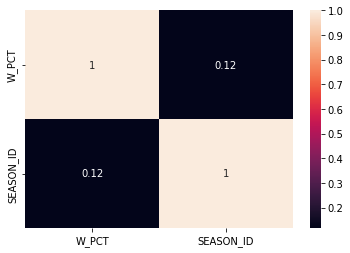

In [128]:
# Make heat map to see correlations
correlation = df[["W_PCT", "SEASON_ID"]].corr()
sns.heatmap(correlation, annot=True)

In [131]:
# Make the cluster of tam using kMeans
from sklearn.cluster import KMeans
KMeans_model = KMeans(n_clusters=5,random_state=1) # creating Kmeans model with 5 clusters
good_columns = df._get_numeric_data().dropna(axis=1) # Get numeric data and remove columns with missing data
KMeans_model.fit(good_columns) # Train the model
labels = KMeans_model.labels_ # Get the labels or (cluster label for each team)
labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [133]:
# Find team Boston
Boston= good_columns.loc[df["TEAM"] == "Boston",: ]
Boston

,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
1729,1610612738,0,22021,68,41,27,0.603,0.0
1744,1610612738,0,22021,68,41,27,0.603,0.0
1759,1610612738,0,22021,67,40,27,0.597,0.0
1774,1610612738,0,22021,67,40,27,0.597,0.0
1789,1610612738,0,22021,66,39,27,0.591,0.0
...,...,...,...,...,...,...,...,...
201728,1610612738,0,22013,82,25,57,0.305,0.0
201743,1610612738,0,22013,82,25,57,0.305,0.0
201758,1610612738,0,22013,82,25,57,0.305,0.0
201773,1610612738,0,22013,82,25,57,0.305,0.0


In [134]:
# Find team Orlando
Orlando= good_columns.loc[df["TEAM"] == "Orlando",: ]
Orlando

,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
1739,1610612753,0,22021,68,18,50,0.265,0.0
1754,1610612753,0,22021,68,18,50,0.265,0.0
1769,1610612753,0,22021,67,17,50,0.254,0.0
1784,1610612753,0,22021,67,17,50,0.254,0.0
1799,1610612753,0,22021,66,16,50,0.242,0.0
...,...,...,...,...,...,...,...,...
201729,1610612753,0,22013,82,23,59,0.280,0.0
201744,1610612753,0,22013,82,23,59,0.280,0.0
201759,1610612753,0,22013,82,23,59,0.280,0.0
201774,1610612753,0,22013,82,23,59,0.280,0.0


In [141]:
def func_PCT(W_PCT):
    if W_PCT >= 0.50:
        return "profitable"
    else:
        return "profitable not"

df["PCT"] = df.W_PCT.apply(func_PCT)

df.head()

# kazancı 0.50 ve 0.50'den büyük olanlara kazançlı diğerleri kazançlı değil.
# kazançlı çıkan batı olmuş.

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,PCT
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,0.0,profitable
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,0.0,profitable
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,0.0,profitable
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,0.0,profitable
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,0.0,profitable


In [143]:
df.groupby("SEASON_ID")["TEAM"].value_counts()

SEASON_ID  TEAM       
12003      Atlanta         23
           Boston          23
           Chicago         23
           Cleveland       23
           Dallas          23
                         ... 
22021      Sacramento     145
           San Antonio    145
           Toronto        145
           Utah           145
           Washington     145
Name: TEAM, Length: 1167, dtype: int64

In [155]:
df.groupby("TEAM").size()

TEAM
Atlanta                      6738
Boston                       6740
Brooklyn                     3446
Charlotte                    6364
Chicago                      6739
Cleveland                    6738
Dallas                       6741
Denver                       6739
Detroit                      6738
Golden State                 6740
Houston                      6740
Indiana                      6738
L.A. Clippers                4384
L.A. Lakers                  6738
LA Clippers                  2354
Memphis                      6740
Miami                        6739
Milwaukee                    6740
Minnesota                    6740
New Jersey                   3292
New Orleans                  6060
New Orleans/Oklahoma City     678
New York                     6740
Oklahoma City                4911
Orlando                      6738
Philadelphia                 6738
Phoenix                      6738
Portland                     6738
Sacramento                   6738
San Anton

In [171]:
# Split the datga into % 80 training and % 20 testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[["SEASON_ID"]], df[["W_PCT"]], test_size=0.2,random_state=2)

In [172]:
# Predict the number of assists per teams from the field profitable made
# Create the Linear Regression Model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train) # training the model
predictions = lr.predict(x_test) # Make predictions on the test data

print(predictions) # Print the predictions
print(y_test) # Print the actual values

[[0.49851242]
 [0.49841921]
 [0.40520033]
 ...
 [0.49842853]
 [0.4985031 ]
 [0.49845649]]
        W_PCT
7640    0.556
129151  0.537
134474  0.750
90714   0.250
74373   0.622
...       ...
153589  0.481
155469  0.364
38681   0.412
24325   0.385
199831  0.526

[40359 rows x 1 columns]


In [173]:
# Test model: Score returns the coefficient of determination R^2 of the prediction
lr_confidence = lr.score(x_test, y_test)
print("lr_confidence: ", lr_confidence)
# % 0,127 variance for assist is explained by the field goald the player

lr_confidence:  0.012707189621454007


In [175]:
# Teams

In [176]:
df = pd.read_csv("teams.csv")
df

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [177]:
df.dtypes

LEAGUE_ID               int64
TEAM_ID                 int64
MIN_YEAR                int64
MAX_YEAR                int64
ABBREVIATION           object
NICKNAME               object
YEARFOUNDED             int64
CITY                   object
ARENA                  object
ARENACAPACITY         float64
OWNER                  object
GENERALMANAGER         object
HEADCOACH              object
DLEAGUEAFFILIATION     object
dtype: object

In [178]:
df.shape # 30 rows , 14 columns or features.

(30, 14)

In [179]:
df.columns

Index(['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION',
       'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
       'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION'],
      dtype='object')

In [180]:
df = pd.read_csv("teams.csv")

df.columns = ['LEAGUE_Number', 'TEAM_Number', 'MIN', 'MAX', 'ABBREVIATION',
       'NICKNAME', 'YEAR_FOUNDED', 'CITY', 'ARENA', 'ARENA_CAPACITY', 'OWNER',
       'GENERAL_MANAGER', 'HEAD_COACH', 'D-League']

df.columns

Index(['LEAGUE_Number', 'TEAM_Number', 'MIN', 'MAX', 'ABBREVIATION',
       'NICKNAME', 'YEAR_FOUNDED', 'CITY', 'ARENA', 'ARENA_CAPACITY', 'OWNER',
       'GENERAL_MANAGER', 'HEAD_COACH', 'D-League'],
      dtype='object')

In [181]:
pd.isnull(df) 
# It's true if it is missing value or null
# It's false if it isn't.

,LEAGUE_Number,TEAM_Number,MIN,MAX,ABBREVIATION,NICKNAME,YEAR_FOUNDED,CITY,ARENA,ARENA_CAPACITY,OWNER,GENERAL_MANAGER,HEAD_COACH,D-League
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [183]:
pd.isnull(df).sum()
# every single column and it adds up all the true values
# if there are no nulls in a column it's going to show zero
#if there are nulls it'll show the number of nulls in that column
# ARENA_CAPACITY contains to missing values.

LEAGUE_Number      0
TEAM_Number        0
MIN                0
MAX                0
ABBREVIATION       0
NICKNAME           0
YEAR_FOUNDED       0
CITY               0
ARENA              0
ARENA_CAPACITY     4
OWNER              0
GENERAL_MANAGER    0
HEAD_COACH         0
D-League           0
dtype: int64

In [184]:
df[pd.isnull(df["ARENA_CAPACITY"])]

,LEAGUE_Number,TEAM_Number,MIN,MAX,ABBREVIATION,NICKNAME,YEAR_FOUNDED,CITY,ARENA,ARENA_CAPACITY,OWNER,GENERAL_MANAGER,HEAD_COACH,D-League
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
12,0,1610612751,1976,2019,BKN,Nets,1976,Brooklyn,Barclays Center,NaN,Joe Tsai,Sean Marks,Kenny Atkinson,Long Island Nets
16,0,1610612755,1949,2019,PHI,76ers,1949,Philadelphia,Wells Fargo Center,NaN,Joshua Harris,Elton Brand,Brett Brown,Delaware Blue Coats
17,0,1610612756,1968,2019,PHX,Suns,1968,Phoenix,Talking Stick Resort Arena,NaN,Robert Sarver,James Jones,Monty Williams,Northern Arizona Suns


In [185]:
df[pd.isnull(df["ARENA_CAPACITY"])][["MIN","MAX"]]

,MIN,MAX
2,2002,2019
12,1976,2019
16,1949,2019
17,1968,2019


In [187]:
df = df.fillna(0)
df

,LEAGUE_Number,TEAM_Number,MIN,MAX,ABBREVIATION,NICKNAME,YEAR_FOUNDED,CITY,ARENA,ARENA_CAPACITY,OWNER,GENERAL_MANAGER,HEAD_COACH,D-League
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,0.0,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [188]:
# Find of the average value for each numeric column
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


LEAGUE_Number     0.000000e+00
TEAM_Number       1.610613e+09
MIN               1.969700e+03
MAX               2.019000e+03
YEAR_FOUNDED      1.969700e+03
ARENA_CAPACITY    1.607953e+04
dtype: float64

In [189]:
# Get the mean or average of specific column
df.loc[:,"YEAR_FOUNDED"].mean()
# Teams founded about in 1969

1969.7

In [190]:
df[["YEAR_FOUNDED", "ARENA_CAPACITY"]].corr()

,YEAR_FOUNDED,ARENA_CAPACITY
YEAR_FOUNDED,1.000000,-0.197584
ARENA_CAPACITY,-0.197584,1.000000


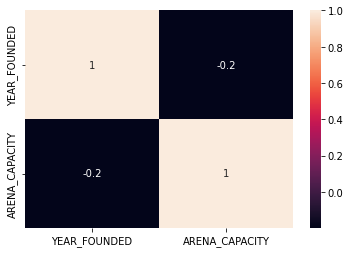

In [191]:
# Make heat map to see correlations
correlation = df[["YEAR_FOUNDED", "ARENA_CAPACITY"]].corr()
sns.heatmap(correlation, annot=True)


In [192]:
# Make the cluster of tam using kMeans
from sklearn.cluster import KMeans
KMeans_model = KMeans(n_clusters=5,random_state=1) # creating Kmeans model with 5 clusters
good_columns = df._get_numeric_data().dropna(axis=1) # Get numeric data and remove columns with missing data
KMeans_model.fit(good_columns) # Train the model
labels = KMeans_model.labels_ # Get the labels or (cluster label for each team)
labels

array([0, 0, 1, 3, 0, 0, 2, 0, 0, 4, 2, 0, 1, 4, 1, 2, 1, 1, 4, 2, 0, 0,
       4, 4, 2, 3, 3, 0, 3, 4], dtype=int32)

In [193]:
def func_CAPACITY(ARENA_CAPACITY):
    if ARENA_CAPACITY >= 18100.0:
        return " Good"
    else:
        return "Not Bad"

df["CAPACITY"] = df.ARENA_CAPACITY.apply(func_CAPACITY)

df.head()


,LEAGUE_Number,TEAM_Number,MIN,MAX,ABBREVIATION,NICKNAME,YEAR_FOUNDED,CITY,ARENA,ARENA_CAPACITY,OWNER,GENERAL_MANAGER,HEAD_COACH,D-League,CAPACITY
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,Good
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws,Good
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,0.0,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate,Not Bad
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls,Good
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends,Good


In [195]:
df.groupby("TEAM_Number")["ARENA_CAPACITY"].value_counts()

TEAM_Number  ARENA_CAPACITY
1610612737   18729.0           1
1610612738   18624.0           1
1610612739   20562.0           1
1610612740   0.0               1
1610612741   21711.0           1
1610612742   19200.0           1
1610612743   19099.0           1
1610612744   19596.0           1
1610612745   18104.0           1
1610612746   19060.0           1
1610612747   19060.0           1
1610612748   19600.0           1
1610612749   17500.0           1
1610612750   19356.0           1
1610612751   0.0               1
1610612752   19763.0           1
1610612753   0.0               1
1610612754   18345.0           1
1610612755   0.0               1
1610612756   0.0               1
1610612757   19980.0           1
1610612758   17500.0           1
1610612759   18694.0           1
1610612760   19163.0           1
1610612761   19800.0           1
1610612762   20148.0           1
1610612763   18119.0           1
1610612764   20647.0           1
1610612765   21000.0           1
1610612766   19

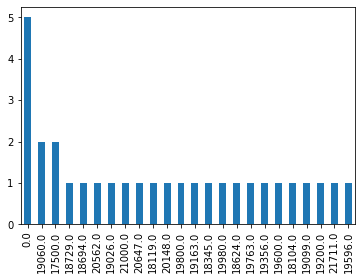

In [201]:
df["ARENA_CAPACITY"].value_counts().plot.bar()

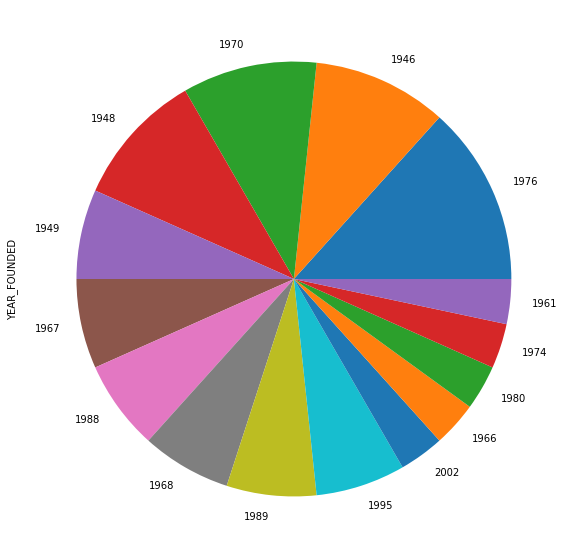

In [202]:
df.YEAR_FOUNDED.value_counts().plot.pie(figsize=(10, 10))

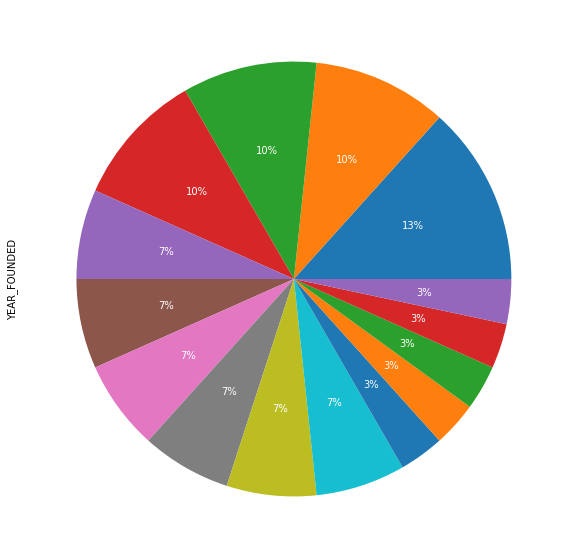

In [203]:
df.YEAR_FOUNDED.value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10), textprops={'color':"w"})

In [204]:
# Games
df = pd.read_csv("games_details.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [205]:
df.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [206]:
df.shape # 645953 rows , 29 columns or features.

(645953, 29)

In [207]:
df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [209]:
df = pd.read_csv("games_details.csv")

df.columns = ['GAME_Number', 'TEAM_Number', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_Number',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS']

df.columns


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['GAME_Number', 'TEAM_Number', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'PLAYER_Number', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [210]:
pd.isnull(df) 
# It's true if it is missing value or null
# It's false if it isn't.

,GAME_Number,TEAM_Number,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_Number,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
645949,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
645950,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
645951,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True


In [211]:
pd.isnull(df).sum()
# every single column and it adds up all the true values
# if there are no nulls in a column it's going to show zero
#if there are nulls it'll show the number of nulls in that column


GAME_Number               0
TEAM_Number               0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_Number             0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       398738
COMMENT              540351
MIN                  105603
FGM                  105603
FGA                  105603
FG_PCT               105603
FG3M                 105603
FG3A                 105603
FG3_PCT              105603
FTM                  105603
FTA                  105603
FT_PCT               105603
OREB                 105603
DREB                 105603
REB                  105603
AST                  105603
STL                  105603
BLK                  105603
TO                   105603
PF                   105603
PTS                  105603
PLUS_MINUS           129264
dtype: int64

In [212]:
df = df.fillna(0)
df
# Boş ya da NA görünen hücreleri 0 ile doldurdum.

,GAME_Number,TEAM_Number,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_Number,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,0,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,0,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,0,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,0,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,0,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,0,0,0,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,0.0
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,0,0,0,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,0.0
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,0,0,0,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,0.0
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,0,0,0,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,0.0


In [216]:
# Get the mean or average of specific column
df.loc[:,"PF"].mean()
# Oyuncunun attığı puan sayısı

1.6755568903619922

In [218]:
df[["PF", "PLAYER_Number"]].corr()

,PF,PLAYER_Number
PF,1.000000,-0.008074
PLAYER_Number,-0.008074,1.000000


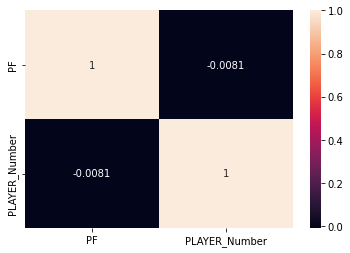

In [219]:
# Make heat map to see correlations
correlation = df[["PF", "PLAYER_Number"]].corr()
sns.heatmap(correlation, annot=True)
# PF ile PLAYER_Number arasında negatif bir korelasyon vardır. % 0,81 negatif bir korelasyon vardır.

In [220]:
# Make the cluster of tam using kMeans
from sklearn.cluster import KMeans
KMeans_model = KMeans(n_clusters=5,random_state=1) # creating Kmeans model with 5 clusters
good_columns = df._get_numeric_data().dropna(axis=1) # Get numeric data and remove columns with missing data
KMeans_model.fit(good_columns) # Train the model
labels = KMeans_model.labels_ # Get the labels or (cluster label for each team)
labels


array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [221]:
# Find team city Minnesota	
Minnesota = good_columns.loc[df["TEAM_CITY"] == "Minnesota",: ]
Minnesota

,GAME_Number,TEAM_Number,PLAYER_Number,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,1630162,4.0,10.0,0.400,3.0,8.0,0.375,4.0,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,1630183,6.0,8.0,0.750,1.0,3.0,0.333,1.0,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,1626157,4.0,9.0,0.444,1.0,3.0,0.333,6.0,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,1627736,4.0,9.0,0.444,4.0,9.0,0.444,0.0,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,1626156,3.0,13.0,0.231,1.0,6.0,0.167,7.0,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645606,11200020,1610612750,201567,5.0,14.0,0.357,0.0,4.0,0.000,2.0,...,2.0,6.0,8.0,2.0,3.0,0.0,2.0,2.0,12.0,0.0
645607,11200020,1610612750,200811,1.0,2.0,0.500,0.0,0.0,0.000,0.0,...,1.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0
645608,11200020,1610612750,200839,0.0,1.0,0.000,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
645609,11200020,1610612750,201593,5.0,11.0,0.455,0.0,0.0,0.000,4.0,...,3.0,2.0,5.0,0.0,0.0,0.0,2.0,3.0,14.0,0.0


In [222]:
# Find team city Denver	
Denver = good_columns.loc[df["TEAM_CITY"] == "Denver",: ]
Denver

,GAME_Number,TEAM_Number,PLAYER_Number,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
106,22101009,1610612743,1628432,2.0,5.0,0.400,0.0,3.0,0.0,1.0,...,0.0,5.0,5.0,2.0,1.0,0.0,2.0,3.0,5.0,5.0
107,22101009,1610612743,201145,6.0,7.0,0.857,0.0,1.0,0.0,1.0,...,0.0,2.0,2.0,1.0,0.0,1.0,2.0,3.0,13.0,-10.0
108,22101009,1610612743,203999,9.0,13.0,0.692,0.0,0.0,0.0,8.0,...,4.0,6.0,10.0,7.0,0.0,2.0,3.0,2.0,26.0,-4.0
109,22101009,1610612743,203115,7.0,13.0,0.538,2.0,4.0,0.5,0.0,...,1.0,4.0,5.0,4.0,0.0,0.0,4.0,4.0,16.0,-12.0
110,22101009,1610612743,1628420,4.0,6.0,0.667,0.0,1.0,0.0,1.0,...,0.0,2.0,2.0,6.0,0.0,0.0,1.0,0.0,9.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,202706,4.0,9.0,0.444,3.0,6.0,0.5,6.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,0.0
645949,11200005,1610612743,202702,7.0,11.0,0.636,0.0,0.0,0.0,4.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,0.0
645950,11200005,1610612743,201585,3.0,7.0,0.429,0.0,0.0,0.0,0.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,0.0
645951,11200005,1610612743,202389,1.0,1.0,1.000,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,0.0


In [224]:

def func_OREB_Number(OREB):
    if OREB == 4.0:
        return "good"
    else:
        return "bad"

df["OREB_Number"] = df.OREB.apply(func_OREB_Number)

df.head(20)

# P.J. Tucker ilk 20'ye bakıldığında savunma ribaund'u iyi olan bir oyuncudur.


,GAME_Number,TEAM_Number,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_Number,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,OREB_Number
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,0,36:22,...,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0,bad
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,0,23:54,...,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0,bad
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,0,25:17,...,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0,bad
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,0,30:52,...,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0,bad
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,0,33:46,...,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0,bad
5,22101005,1610612750,MIN,Minnesota,1629675,Naz Reid,Naz,0,0,23:56,...,7.0,10.0,1.0,3.0,2.0,1.0,1.0,11.0,-7.0,bad
6,22101005,1610612750,MIN,Minnesota,1629162,Jordan McLaughlin,Jordan,0,0,21:00,...,1.0,1.0,3.0,3.0,0.0,0.0,1.0,5.0,-10.0,bad
7,22101005,1610612750,MIN,Minnesota,1629669,Jaylen Nowell,Jaylen,0,0,21:35,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,-5.0,bad
8,22101005,1610612750,MIN,Minnesota,1627752,Taurean Prince,Taurean,0,0,22:53,...,2.0,2.0,1.0,1.0,0.0,1.0,2.0,11.0,1.0,bad
9,22101005,1610612750,MIN,Minnesota,1629006,Josh Okogie,Josh,0,0,0:25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bad


In [225]:
df.groupby("OREB")["PF"].value_counts()

OREB  PF 
0.0   0.0    172432
      1.0     68638
      2.0     56667
      3.0     37863
      4.0     20648
              ...  
14.0  4.0         1
15.0  3.0         1
      4.0         1
16.0  3.0         1
18.0  4.0         1
Name: PF, Length: 101, dtype: int64

In [226]:
df.groupby("PF").size()

PF
0.0     204358
1.0     127292
2.0     124324
3.0      95762
4.0      59266
5.0      27674
6.0       7276
15.0         1
dtype: int64

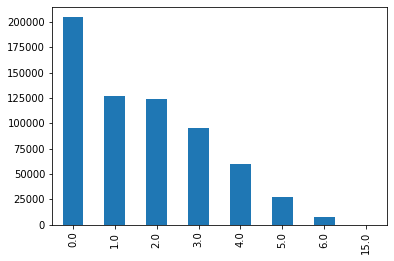

In [227]:
df["PF"].value_counts().plot.bar()

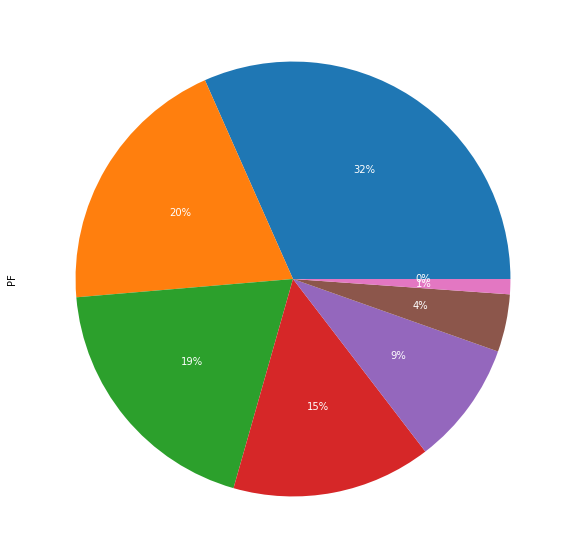

In [228]:
df.PF.value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10), textprops={'color':"w"})

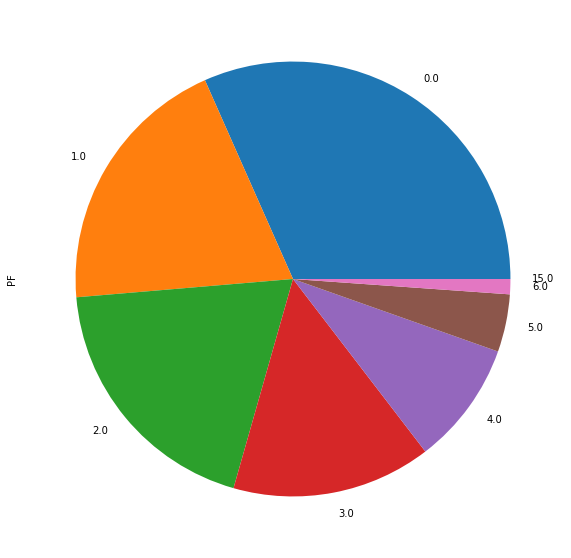

In [231]:
df.PF.value_counts().plot.pie(figsize=(10, 10))
# Oyuncunun attığı puan sayısı % 32'si 0'dır.
# % 0 ile 1 aralığında olan 6 ya da 15 puan sayısı almıştır.